In [164]:
#import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [173]:
data_path  = 'data.csv'

df = pd.read_csv(data_path)
df = df[(1000 < df["timestamp"]) & (df["timestamp"] < 1e7)]
df.sort_values(by=['timestamp'], inplace=True)

In [174]:
# lowpass filter
import pandas as pd
from scipy.signal import butter, filtfilt

# Butterworth low-pass filter function
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff / nyq  # Normalized cutoff frequency
    b, a = butter(order, normal_cutoff, btype='low', analog=False)  # Butterworth filter coefficients
    return b, a

def lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)  # Get filter coefficients
    y = filtfilt(b, a, data)  # Apply filter to data
    return y

df_fil = df.copy()

for col in ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']:
    df_fil[col] = lowpass_filter(df[col], 5, 224.2)

<Axes: xlabel='timestamp'>

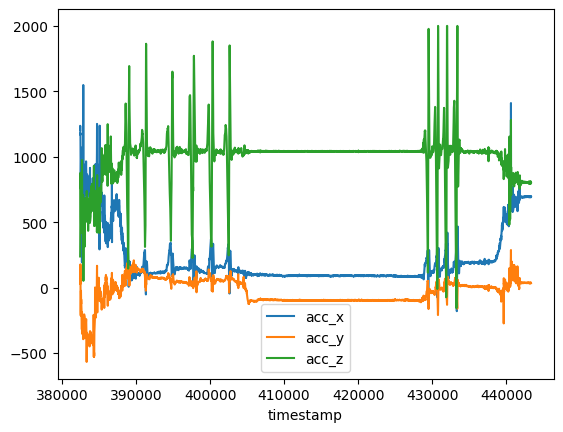

In [175]:
df.plot(x='timestamp', y=['acc_x', 'acc_y', 'acc_z'])

<Axes: xlabel='timestamp'>

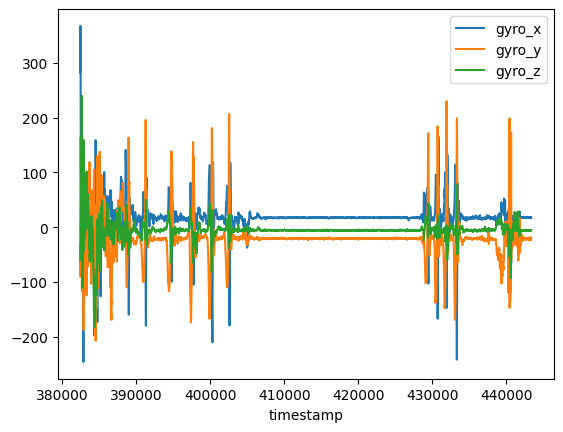

In [176]:
df.plot(x='timestamp', y=['gyro_x', 'gyro_y', 'gyro_z'])

In [178]:
ppg_path = r'C:\Users\lhauptmann\Code\wrist_ppg\recordings\pilot\MAX86177_20241009_190640.ppg.csv'

df_ppg = pd.read_csv(ppg_path, skiprows=32, skipfooter=5)

C:\Users\lhauptmann\AppData\Local\Temp\ipykernel_17668\946557296.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df_ppg = pd.read_csv(ppg_path, skiprows=32, skipfooter=5)


<Axes: xlabel='timestamp'>

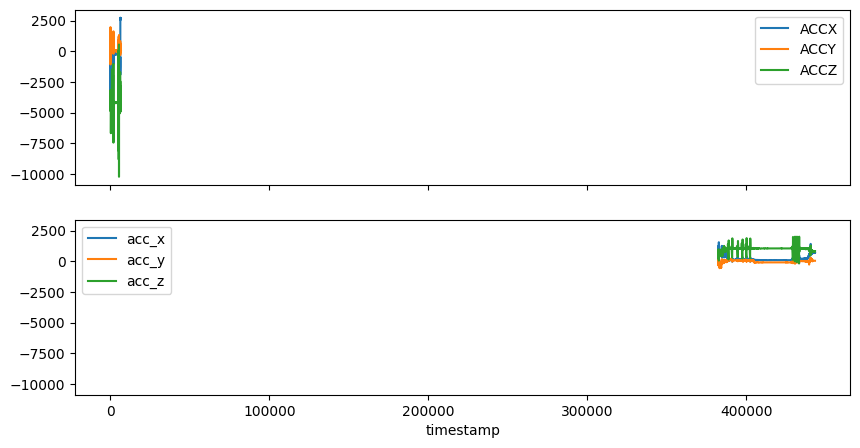

In [181]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5), sharex=True, sharey=True)

df_ppg[["ACCX", "ACCY", "ACCZ"]].plot(ax=axes[0])
df.plot(x=df["timestamp"] - df["timestamp"].min(), y=['acc_x', 'acc_y', 'acc_z'], ax=axes[1])